# PROBLEM STATEMENT 

#### AIDS VIRUS INFECTION PREDICTION

The goal is to create a predictive model that can effectively distinguish between HIV-positive and HIV-negative individuals to  enable early diagnosis and intervention.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
import matplotlib
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"F:\Downloads\AIDS_patients_data.csv")

## Exaploratory Data Analysis
1. Missing values
2. Finding duplicates
3. Finding outliers & handling them 
4. Visualize the distribution of numerical features
5. Exlporing about categorical variables
6. Finding relationship between features & target variable

In [4]:
# To get records which are present at top

df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,988,2,42,71.76131,0,0,0,100,0,1,...,1,3,0,0,0,290,408,1870,1671,0
1,413,3,30,72.67629,0,1,0,100,0,1,...,0,1,0,0,0,506,446,1372,523,0
2,1119,0,37,73.75514,0,1,0,90,0,1,...,1,3,0,0,0,499,542,609,1474,0
3,680,3,34,70.03769,0,0,0,100,0,0,...,0,1,0,1,0,313,478,780,987,0
4,1043,3,35,63.02845,0,0,0,100,0,1,...,0,1,0,1,0,337,761,698,1735,0


In [5]:
# to get records which present at bottom(tail)
df.tail()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
72134,1162,3,36,59.63057,0,1,0,100,0,0,...,0,1,0,1,1,263,358,2091,608,0
72135,1158,0,27,102.69575,0,0,0,90,0,0,...,0,1,0,1,0,327,582,839,392,0
72136,468,3,40,79.07121,0,1,1,90,0,1,...,1,3,0,1,0,283,211,2325,1000,1
72137,1194,2,40,80.51779,0,0,0,90,0,0,...,1,3,1,1,0,237,406,560,860,0
72138,582,3,31,65.35591,0,1,0,90,0,1,...,1,3,0,1,0,248,525,1547,1223,1


In [6]:
# To get the column names 
df.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')

In [7]:
# Data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72139 entries, 0 to 72138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      72139 non-null  int64  
 1   trt       72139 non-null  int64  
 2   age       72139 non-null  int64  
 3   wtkg      72139 non-null  float64
 4   hemo      72139 non-null  int64  
 5   homo      72139 non-null  int64  
 6   drugs     72139 non-null  int64  
 7   karnof    72139 non-null  int64  
 8   oprior    72139 non-null  int64  
 9   z30       72139 non-null  int64  
 10  preanti   72139 non-null  int64  
 11  race      72139 non-null  int64  
 12  gender    72139 non-null  int64  
 13  str2      72139 non-null  int64  
 14  strat     72139 non-null  int64  
 15  symptom   72139 non-null  int64  
 16  treat     72139 non-null  int64  
 17  offtrt    72139 non-null  int64  
 18  cd40      72139 non-null  int64  
 19  cd420     72139 non-null  int64  
 20  cd80      72139 non-null  in

In [8]:
# shape of df

df.shape

(72139, 23)

observation - 
Dataset contains 72139 rows & 23 columns

In [9]:
# Describing df
df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,...,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000
mean,877.563967,1.390358,34.224248,75.878443,0.034641,0.653211,0.131621,96.783543,0.041323,0.639183,...,0.575833,1.938411,0.086902,0.734901,0.343642,319.993055,435.592648,1045.151014,907.328089,0.308252
std,306.777676,1.231599,7.135905,12.126740,0.182871,0.475951,0.338080,5.126597,0.199038,0.480241,...,0.494219,0.895116,0.281693,0.441389,0.474927,103.189197,144.621430,488.924280,342.972967,0.461775
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,545.000000,0.000000,29.000000,68.213340,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,236.000000,325.000000,713.000000,649.000000,0.000000
50%,1043.000000,1.000000,34.000000,74.065720,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,300.000000,413.000000,887.000000,858.000000,0.000000
75%,1135.000000,3.000000,39.000000,81.215415,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,397.000000,528.000000,1245.000000,1085.000000,1.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


observation - 
The discription of each column states the count ,standard deviation, mean , median , maximum value

## Missing values identification 

In [10]:
df.isnull().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [11]:
df.isnull().sum()[df.isnull().sum()>0]  # null

Series([], dtype: int64)

Observation - The given dataset does not contain any null values

## Finding duplicates 

In [12]:
df.duplicated().sum()

0

Observation - The given dataset does not contain any duplicates in it.

### 2. Exploring about the Numerical Variables

In [13]:
# to check data type

num_feat = df.dtypes
num_feat

time          int64
trt           int64
age           int64
wtkg        float64
hemo          int64
homo          int64
drugs         int64
karnof        int64
oprior        int64
z30           int64
preanti       int64
race          int64
gender        int64
str2          int64
strat         int64
symptom       int64
treat         int64
offtrt        int64
cd40          int64
cd420         int64
cd80          int64
cd820         int64
infected      int64
dtype: object

## Count Of Infected Variables

<Axes: xlabel='infected', ylabel='count'>

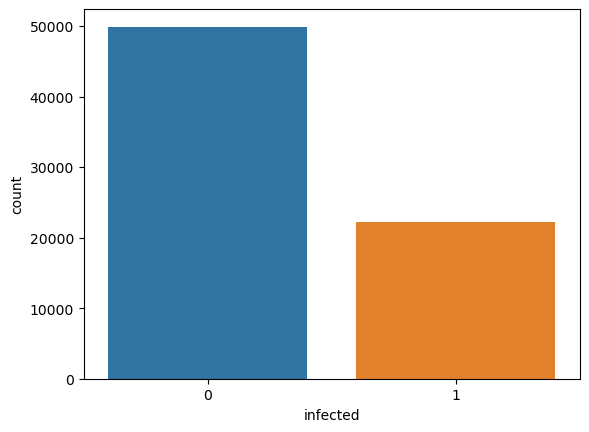

In [14]:
target = 'infected'
sns.countplot(x=df[target])

## Visualize the distribution of numerical features

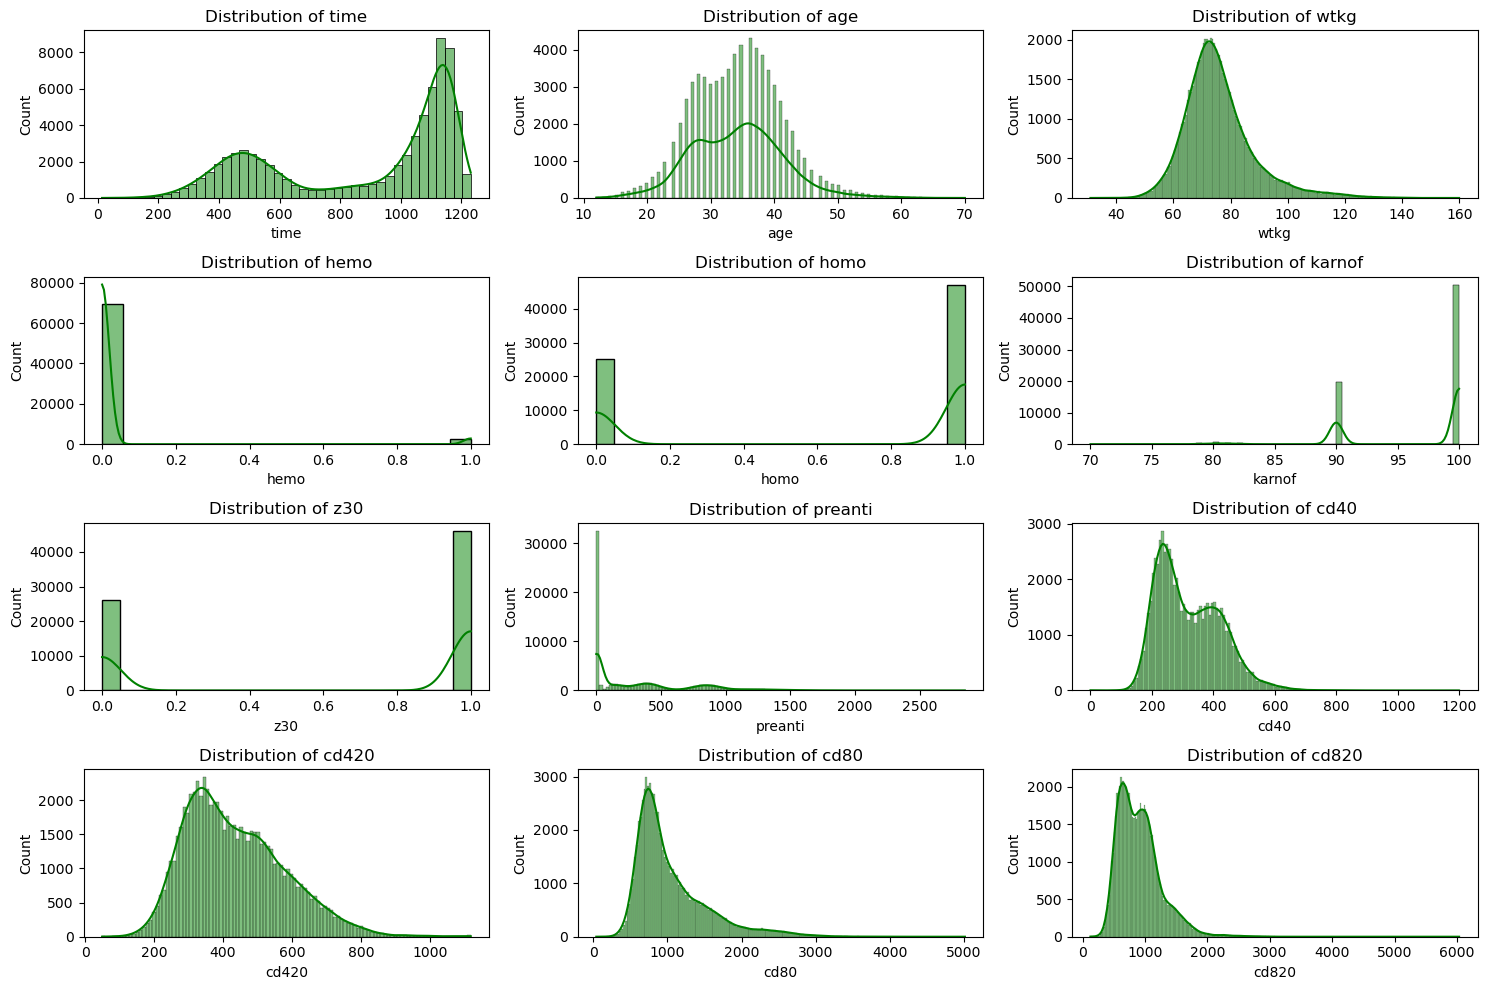

In [15]:
numerical_features = ['time', 'age', 'wtkg', 'hemo', 'homo', 'karnof', 'z30','preanti', 'cd40', 'cd420', 'cd80', 'cd820']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[feature].dropna(),color = 'Green', kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

### Observation: 

* Age    -   Mean & median are around same , so it seems that it is normally distributed.


* Weight -   Almost normally distributed. Slightly positively skewed.


* hemo   -   [Hemophilia] , Majority of the patients do not have hemophilia.


* homo   -   [Homosexual Activity], Majority of the patients have indulged in homosexual activity.


* karnof -   Karnofsky score(on a scale of 0-100),The distribution is negatively skewed as most of the patients 
           have karnfosky score of 100 which is a good sign.


* z30    -   ZDV in the 30 days prior to 175,No evident high correlation
           Most of the patients were administered the drug. can assess its potential impact on patient outcomes.


* preanti -  Distribution of days patients has been on ART, Mean is high as compared to the meadian, there are outliers present


* cd40    -  CD4 at baseline,Most of the patients have a count of white blood cells type closer to 300 which is a bit concerning


* cd420   -  The CD4 count at 20 weeks,There is a shift to the right. This shows that the treatment is working.


* cd80    -  cytotoxic T cells, controlling the infection by killing HIV-infected cells.
           Half of the population has a high count of CD8 cells which means that their 
           immune system is quite active.


* cd820   -  A increased in CD8 count at 20 week can indicate effective antiretroviral therapy (ART), immune system
           responding well to treatment


## Explore relationships between categorical features and target variable

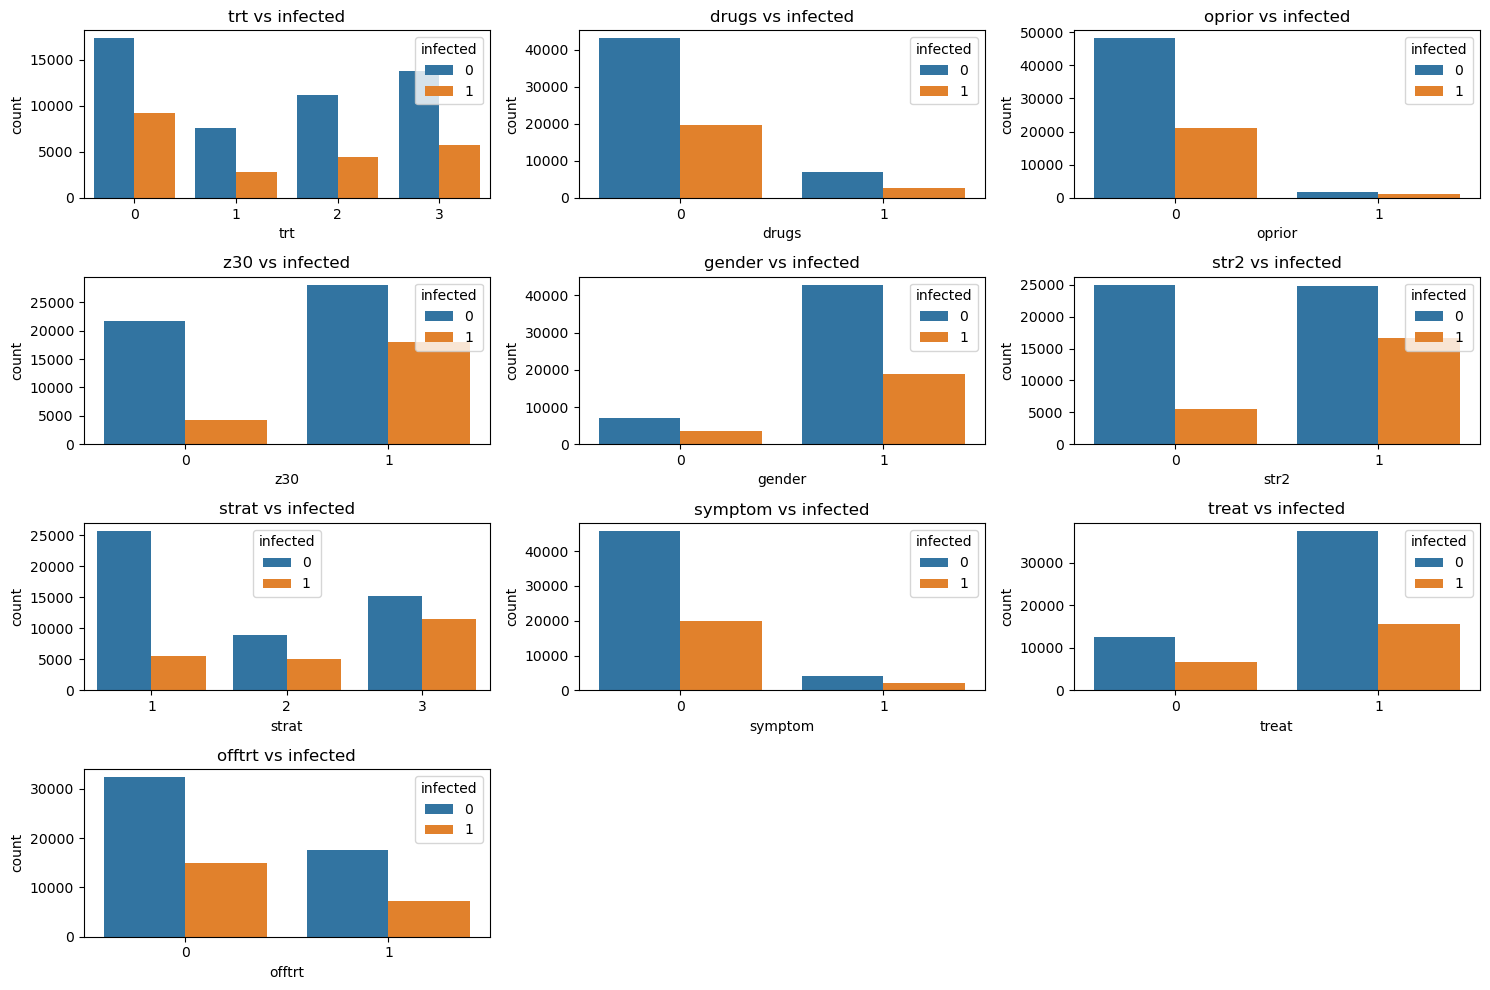

In [18]:
categorical_features = ['trt', 'drugs', 'oprior', 'z30', 'gender','str2', 'strat', 'symptom', 'treat', 'offtrt']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 3, i+1)
    sns.countplot(x=feature, hue='infected', data=df)
    plt.title(f'{feature} vs infected')
plt.tight_layout()
plt.show()

### Observation 

* trt      -  Treatment indicator , The majority of patients are receiving ZDV only or ddI only.
              [0 = ZDV(Zidovudine) only, 1 = ZDV + ddI(Didanosine) , 2 = ZDV + Zal(Zalcitabine), 3 = ddI only ]
    
* drugs    -  History of intravenous (IV) drug used, Majority of the patients do not have a history of drug use.

* z30      -  ZDV in the 30 days prior to 175 , The variable "z30" refers to whether Zidovudine (ZDV), an antiretroviral                     medication,was administered in the 30 days prior to the 175-week mark of observation.  
* oprior   -  Non-ZDV antiretroviral therapy pre 175 days, Majority of the patients were not administered the antiretroviral 
              therapy.  
* gender   -  Majority of the patients are male.
* str2     -  Antiretroviral history (0=not received therapy, 1=experienced therapy)
* symptom  -  Symptomatic indicator (0=asymp, 1=symp),Most of the patients had no signs of any symptom.
* treat    -  Treatment indicator (0=ZDV only, 1=others),Majority of patients undertook treatments other than just ZDV. 
* offtrt   -  Indicator of off-trt before 96+/-5 weeks (0=no,1=yes) , Majority of patients have successfully maintained their 
              ART therapy without significant interruptions over the specified period.  


## Outliers Findings & Outliers Handling

Observation  -
Handeled outliers which are present in columns like age  ,wkg , preante , cd540 , cd420 , cd80 , cd820

### OUTLIERS DETECTION

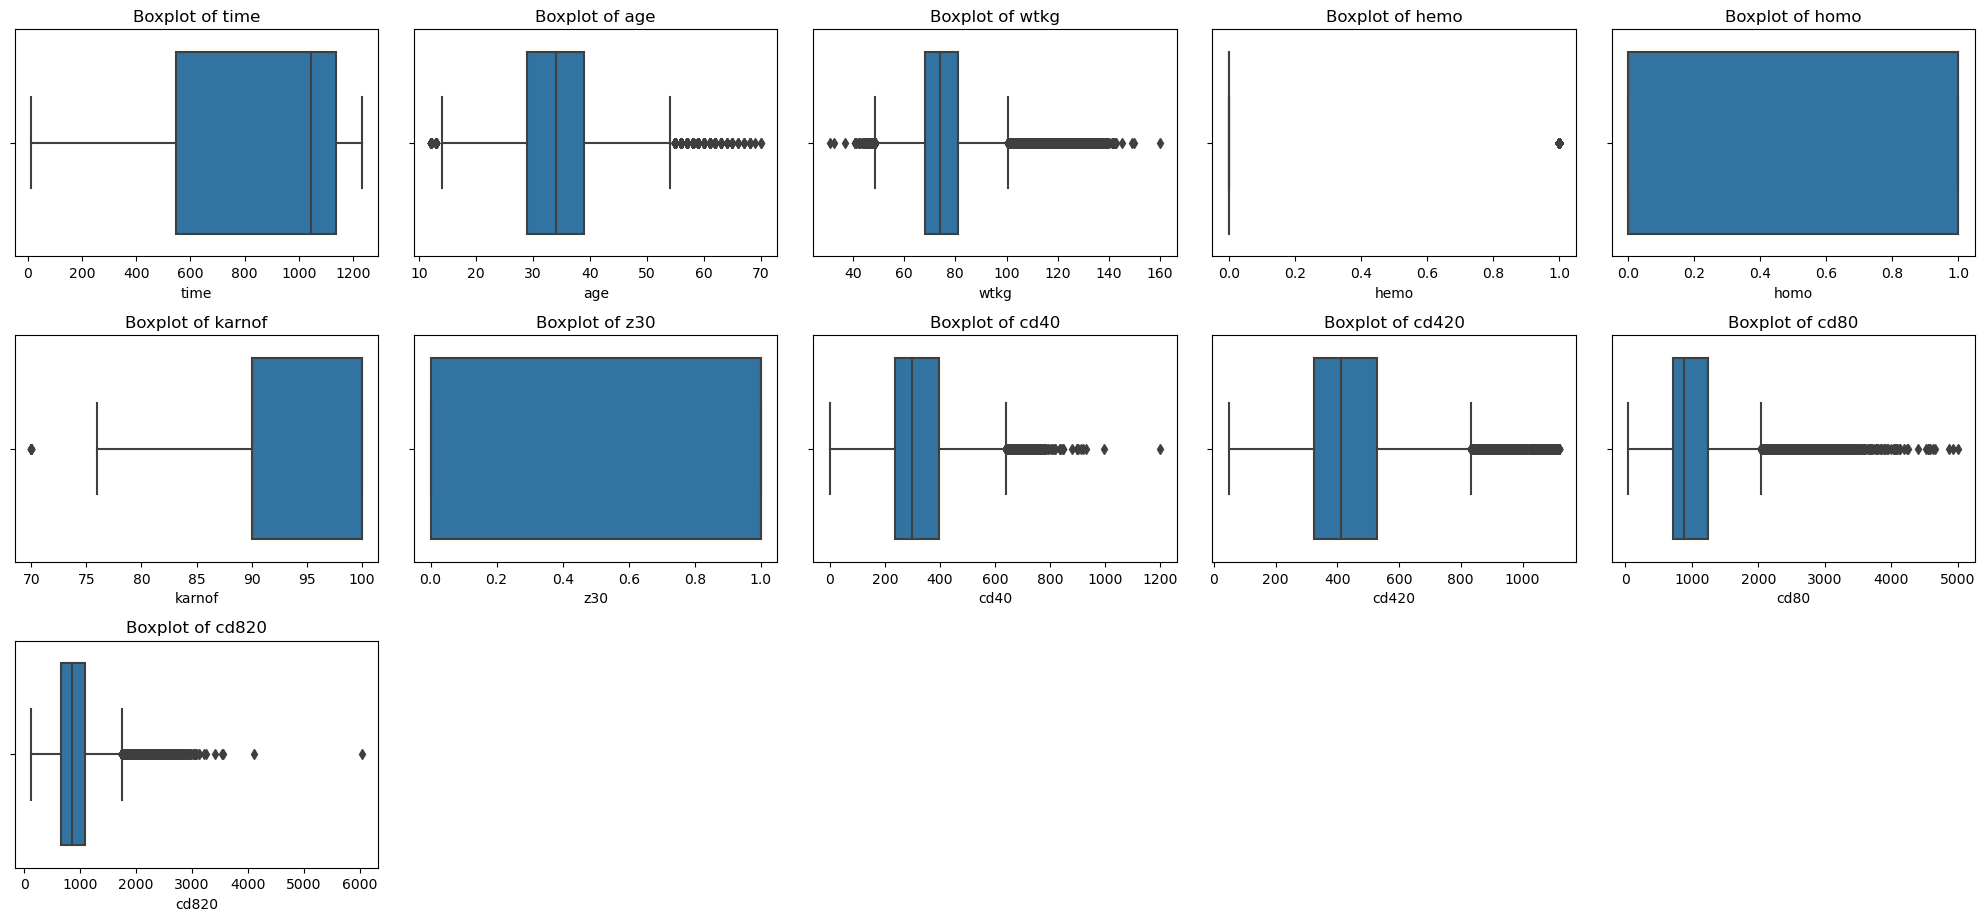

In [19]:
numerical_features = ['time', 'age', 'wtkg', 'hemo', 'homo', 'karnof', 'z30', 'cd40', 'cd420', 'cd80', 'cd820']

plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=df[col])  # Pass the column as a keyword argument
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [20]:
# finding the outlier
percentile25=df["time"].quantile(0.25)
percentile75=df["time"].quantile(0.75)
# IQR CALCULATED
iqr=percentile75 - percentile25
iqr

# checking upper and lower limit in distance variable
upper_limit=percentile75 + 1.5*iqr # UPPER LIMIT
lower_limit=percentile25 - 1.5*iqr # LOWER LIMIT
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

# capping
new_df_cap = df.copy()

new_df_cap["time"]= np.where(
    new_df_cap["time"] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap["time"] < lower_limit,
        lower_limit,
        new_df_cap["time"]
    )

)
# Assign the modified "time" column back to the original dataset

df['time'] = new_df_cap['time']

upper_limit 2020.0
lower_limit -340.0


<Axes: xlabel='time'>

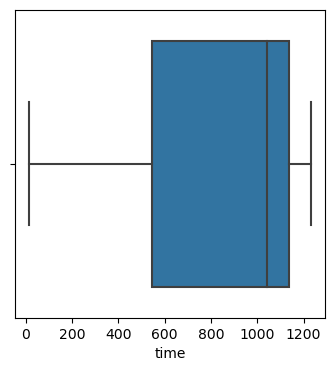

In [21]:
plt.figure(figsize=(4, 4))
sns.boxplot(x=df['time'])

In [22]:
# finding the outlier
percentile25=df["wtkg"].quantile(0.25)
percentile75=df["wtkg"].quantile(0.75)
# IQR CALCULATED
iqr=percentile75 - percentile25
iqr

# checking upper and lower limit in distance variable
upper_limit=percentile75 + 1.5*iqr # UPPER LIMIT
lower_limit=percentile25 - 1.5*iqr # LOWER LIMIT
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

# capping
new_df_cap = df.copy()

new_df_cap["wtkg"]= np.where(
    new_df_cap["wtkg"] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap["wtkg"] < lower_limit,
        lower_limit,
        new_df_cap["wtkg"]
    )

)
# Assign the modified "wtkg" column back to the original dataset

df['wtkg'] = new_df_cap['wtkg']

upper_limit 100.71852750000002
lower_limit 48.710227499999995


<Axes: xlabel='wtkg'>

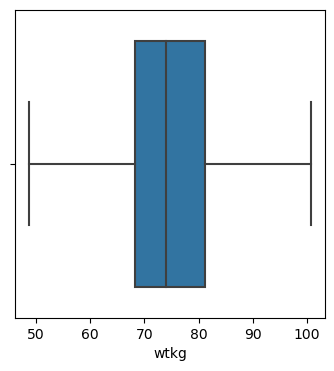

In [23]:
plt.figure(figsize=(4,4))
sns.boxplot(x=df['wtkg'])

In [24]:
# finding the outlier
percentile25=df["cd420"].quantile(0.25)
percentile75=df["cd420"].quantile(0.75)
# IQR CALCULATED
iqr=percentile75 - percentile25
iqr

# checking upper and lower limit in distance variable
upper_limit=percentile75 + 1.5*iqr # UPPER LIMIT
lower_limit=percentile25 - 1.5*iqr # LOWER LIMIT
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

# capping
new_df_cap = df.copy()

new_df_cap["cd420"]= np.where(
    new_df_cap["cd420"] > upper_limit,
     upper_limit,
    np.where(
        new_df_cap["cd420"] < lower_limit,
        lower_limit,
        new_df_cap["cd420"]
    )

)
# Assign the modified "cd420" column back to the original dataset

df['cd420'] = new_df_cap['cd420']

upper_limit 832.5
lower_limit 20.5


<Axes: xlabel='cd420'>

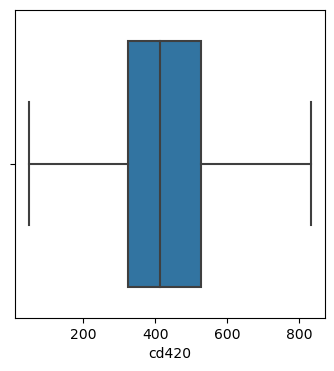

In [25]:
plt.figure(figsize=(4,4))
sns.boxplot(x=df['cd420'])

In [26]:
# finding the outlier
percentile25=df["preanti"].quantile(0.25)
percentile75=df["preanti"].quantile(0.75)
# IQR CALCULATED
iqr=percentile75 - percentile25
iqr

# checking upper and lower limit in distance variable
upper_limit=percentile75 + 1.5*iqr # UPPER LIMIT
lower_limit=percentile25 - 1.5*iqr # LOWER LIMIT
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

# capping
new_df_cap = df.copy()

new_df_cap["preanti"]= np.where(
    new_df_cap["preanti"] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap["preanti"] < lower_limit,
        lower_limit,
        new_df_cap["preanti"]
    )

)
# Assign the modified "preanti" column back to the original dataset

df['preanti'] = new_df_cap['preanti']

upper_limit 1265.0
lower_limit -759.0


<Axes: xlabel='preanti'>

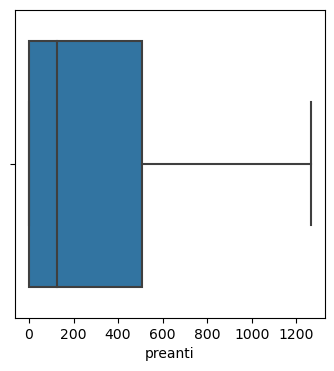

In [27]:
plt.figure(figsize=(4,4))
sns.boxplot(x=df['preanti'])

In [28]:
# finding the outlier
percentile25=df["cd40"].quantile(0.25)
percentile75=df["cd40"].quantile(0.75)
# IQR CALCULATED
iqr=percentile75 - percentile25
iqr

# checking upper and lower limit in distance variable
upper_limit=percentile75 + 1.5*iqr # UPPER LIMIT
lower_limit=percentile25 - 1.5*iqr # LOWER LIMIT
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

# capping
new_df_cap = df.copy()

new_df_cap["cd40"]= np.where(
    new_df_cap["cd40"] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap["cd40"] < lower_limit,
        lower_limit,
        new_df_cap["cd40"]
    )

)
# Assign the modified "cd40" column back to the original dataset

df['cd40'] = new_df_cap['cd40']

upper_limit 638.5
lower_limit -5.5


<Axes: xlabel='cd40'>

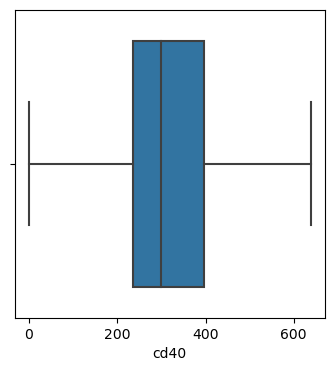

In [29]:
plt.figure(figsize=(4,4))
sns.boxplot(x=df['cd40'])

upper_limit 2043.0
lower_limit -85.0


<Axes: xlabel='cd80'>

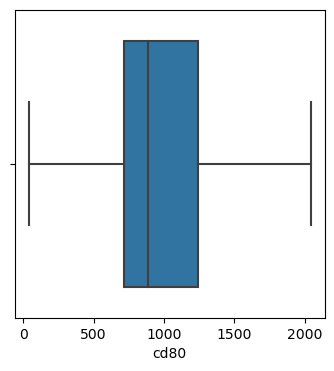

In [30]:
# finding the outlier
percentile25=df["cd80"].quantile(0.25)
percentile75=df["cd80"].quantile(0.75)
# IQR CALCULATED
iqr=percentile75 - percentile25
iqr

# checking upper and lower limit in distance variable
upper_limit=percentile75 + 1.5*iqr # UPPER LIMIT
lower_limit=percentile25 - 1.5*iqr # LOWER LIMIT
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

# capping
new_df_cap = df.copy()

new_df_cap["cd80"]= np.where(
    new_df_cap["cd80"] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap["cd80"] < lower_limit,
        lower_limit,
        new_df_cap["cd80"]
    )

)
# Assign the modified "cd80" column back to the original dataset

df['cd80'] = new_df_cap['cd80']
plt.figure(figsize=(4,4))
sns.boxplot(x=df['cd80'])

upper_limit 1739.0
lower_limit -5.0


<Axes: xlabel='cd820'>

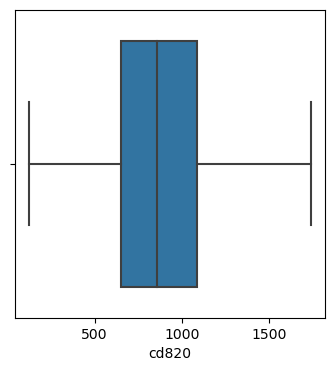

In [31]:
# finding the outlier
percentile25=df["cd820"].quantile(0.25)
percentile75=df["cd820"].quantile(0.75)
# IQR CALCULATED
iqr=percentile75 - percentile25
iqr

# checking upper and lower limit in distance variable
upper_limit=percentile75 + 1.5*iqr # UPPER LIMIT
lower_limit=percentile25 - 1.5*iqr # LOWER LIMIT
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

# capping
new_df_cap = df.copy()

new_df_cap["cd820"]= np.where(
    new_df_cap["cd820"] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap["cd820"] < lower_limit,
        lower_limit,
        new_df_cap["cd820"]
    )

)
# Assign the modified "cd820" column back to the original dataset

df['cd820'] = new_df_cap['cd820']
plt.figure(figsize=(4,4))
sns.boxplot(x=df['cd820'])

upper_limit 54.0
lower_limit 14.0


<Axes: xlabel='age'>

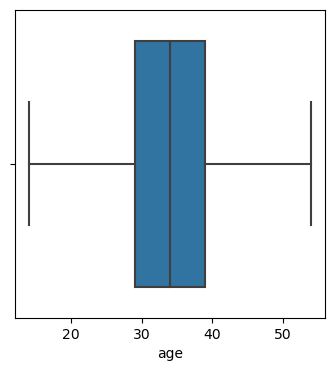

In [32]:
# finding the outlier
percentile25=df["age"].quantile(0.25)
percentile75=df["age"].quantile(0.75)
# IQR CALCULATED
iqr=percentile75 - percentile25
iqr

# checking upper and lower limit in distance variable
upper_limit=percentile75 + 1.5*iqr # UPPER LIMIT
lower_limit=percentile25 - 1.5*iqr # LOWER LIMIT
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

# capping
new_df_cap = df.copy()

new_df_cap["age"]= np.where(
    new_df_cap["age"] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap["age"] < lower_limit,
        lower_limit,
        new_df_cap["age"]
    )

)
# Assign the modified "age" column back to the original dataset

df['age'] = new_df_cap['age']

plt.figure(figsize=(4,4))
sns.boxplot(x=df['age'])


## After removing outliers

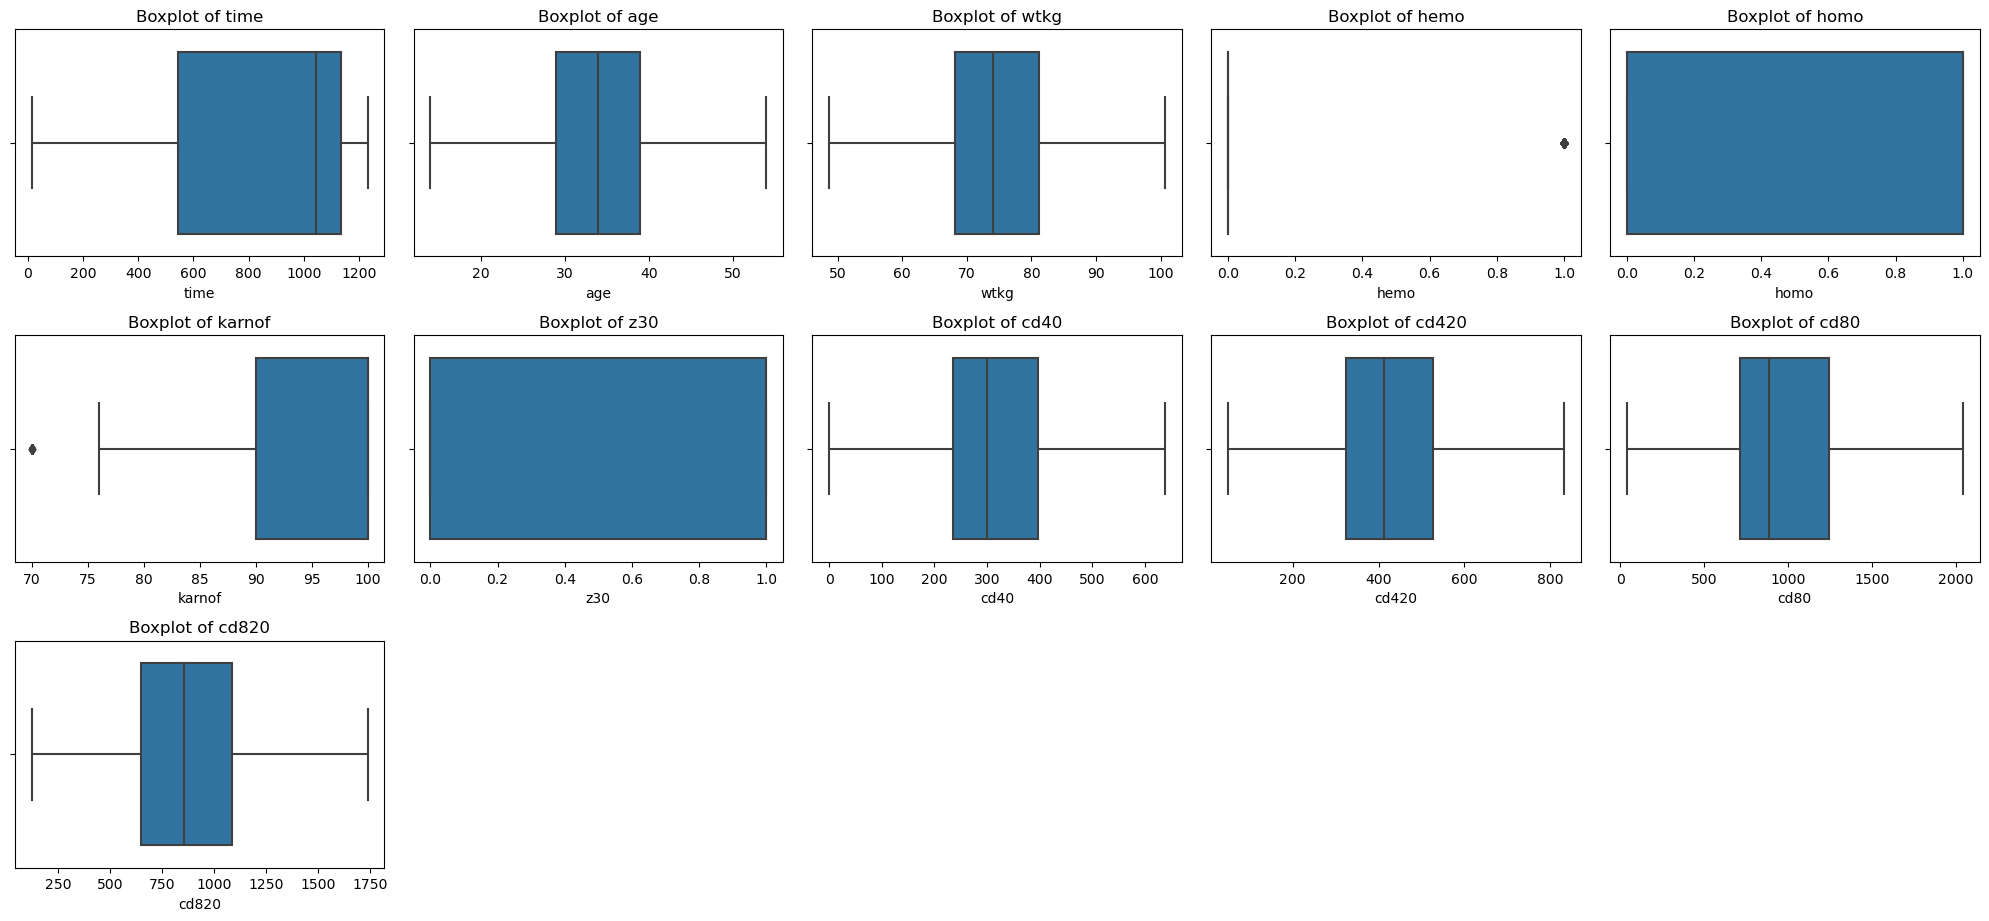

In [33]:
numerical_features = ['time', 'age', 'wtkg', 'hemo', 'homo', 'karnof', 'z30', 'cd40', 'cd420', 'cd80', 'cd820']

plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=df[col])  # Pass the column as a keyword argument
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## Interpreting the percentage amount & count of each feature

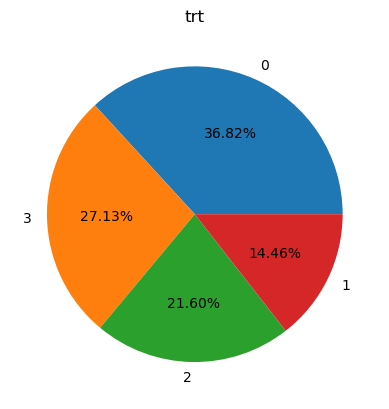

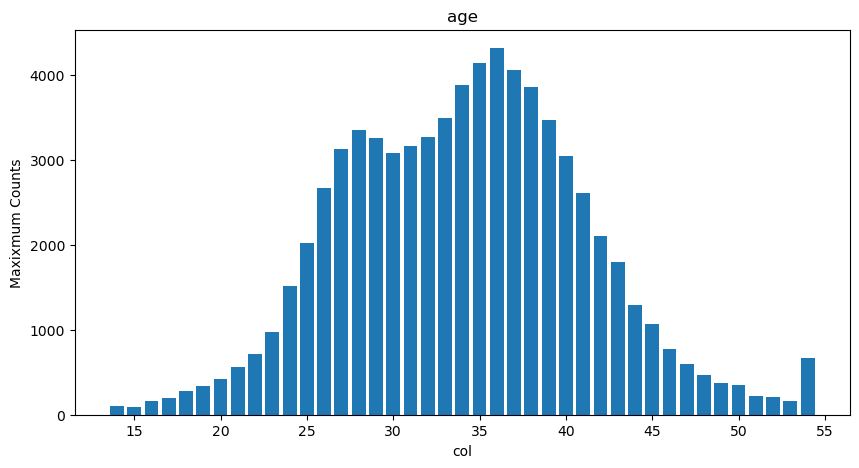

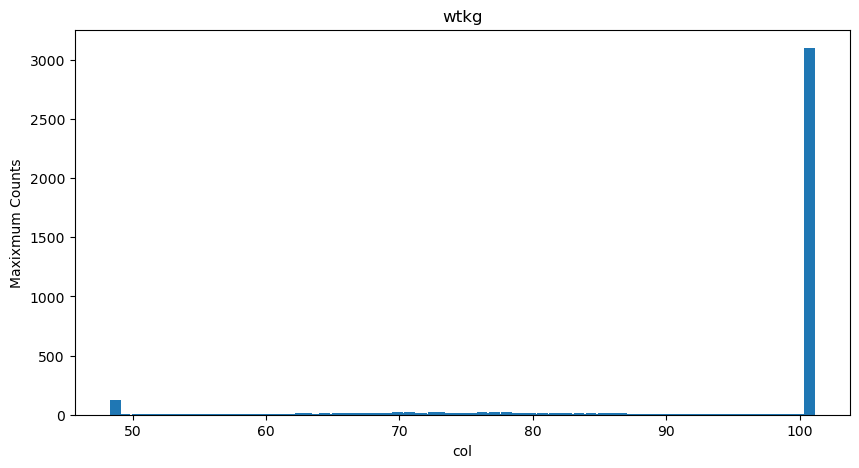

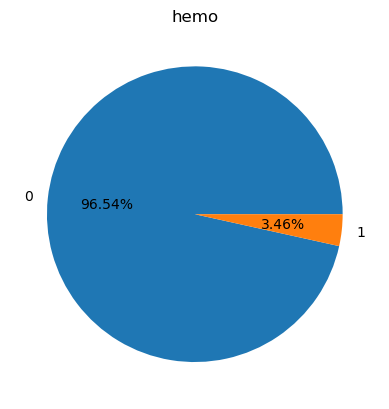

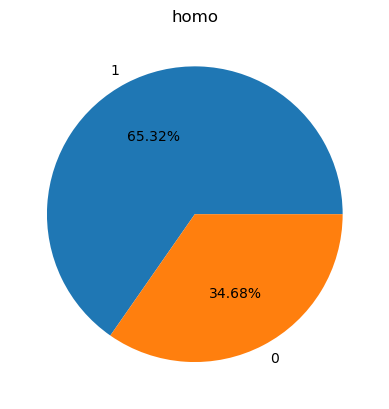

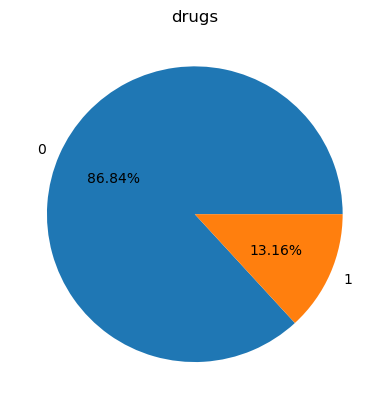

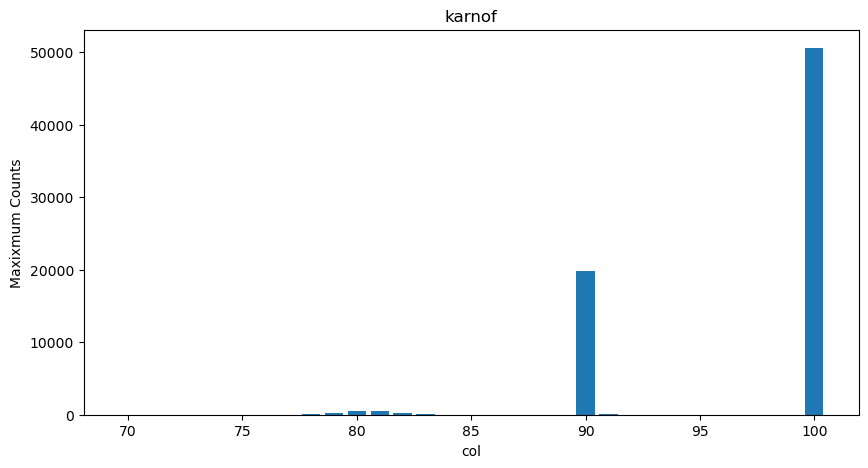

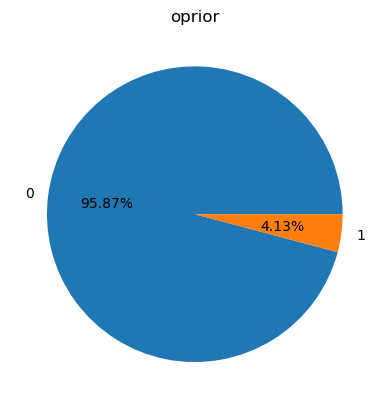

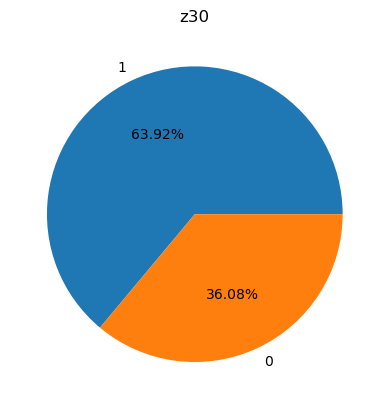

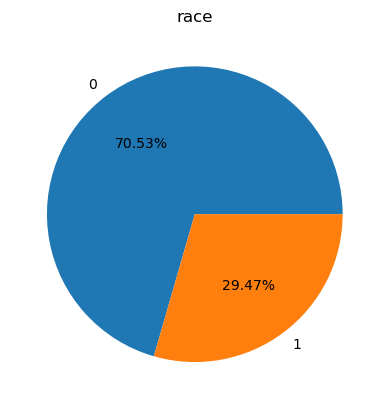

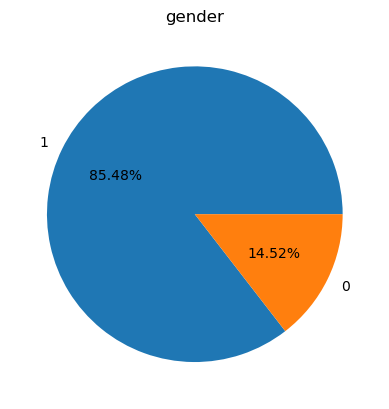

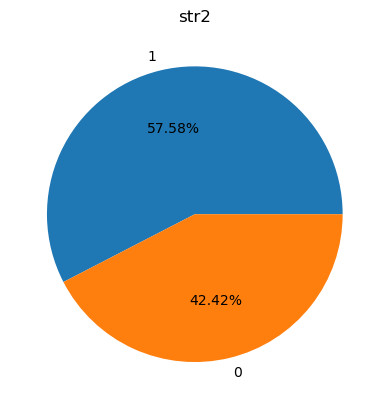

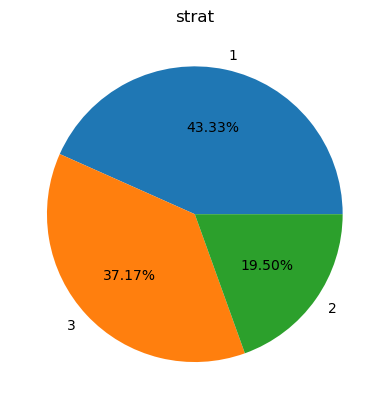

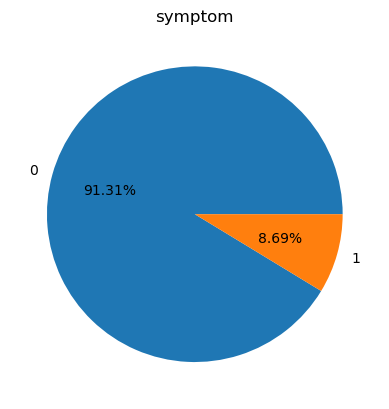

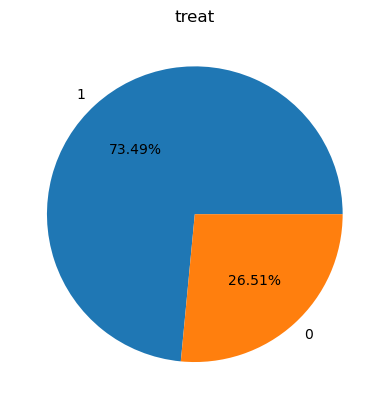

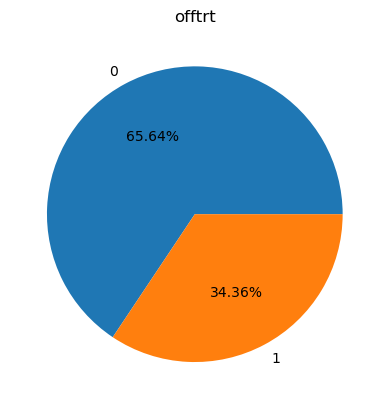

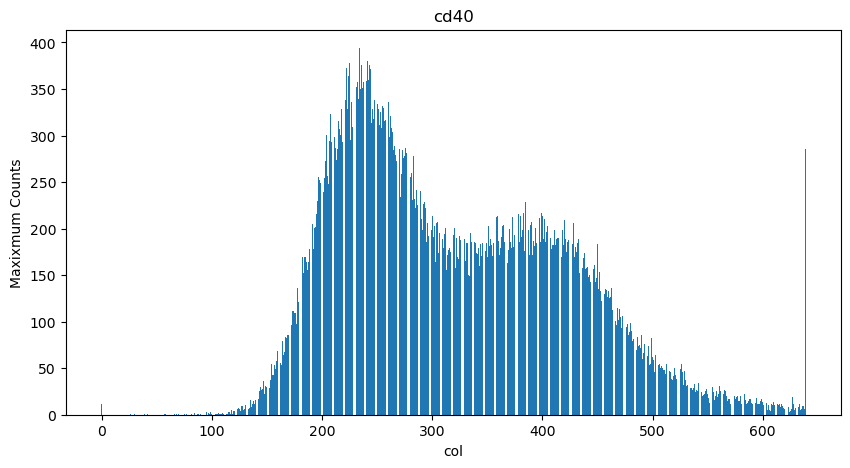

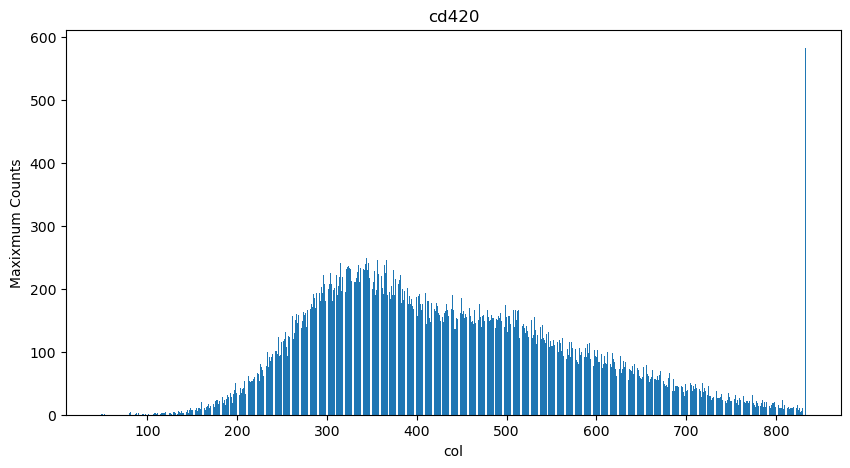

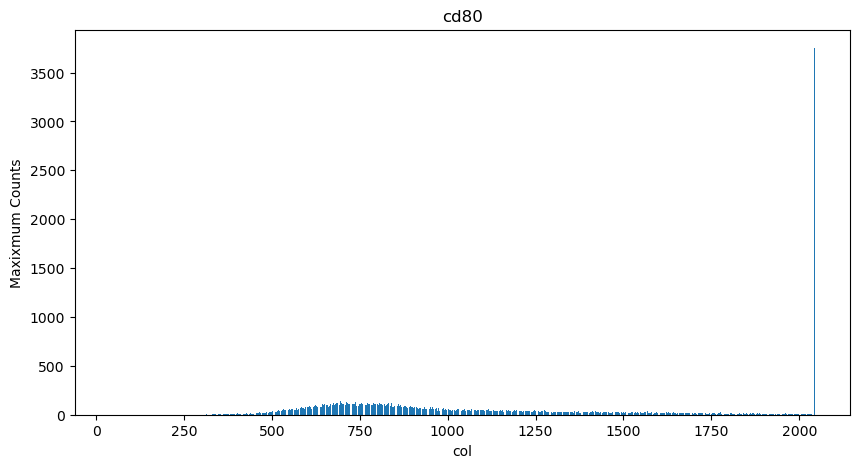

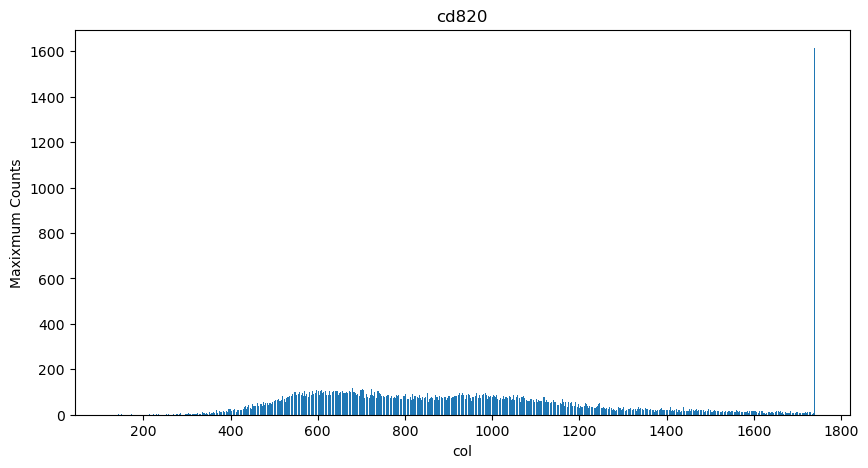

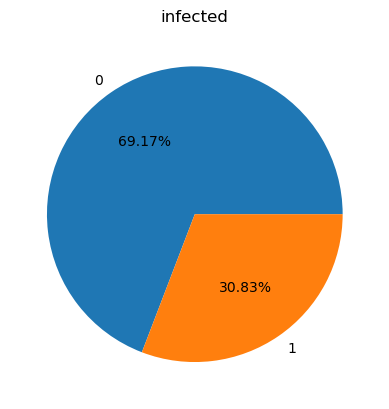

In [34]:
for col in df.columns:
    if col == 'time' or col == 'preanti':
        continue
    counts = df[col].value_counts()
    if len(counts.index) < 5:
        plt.pie(counts , labels = counts.index, autopct = '%1.2f%%')
        plt.title(col)
        plt.show()
    else:
        plt.figure(figsize = (10,5))
        plt.bar(x = counts.index , height = counts.values)
        plt.title(col)
        plt.xlabel("col")
        plt.ylabel("Maxixmum Counts")
        plt.show()

# HEATMAP

<Axes: >

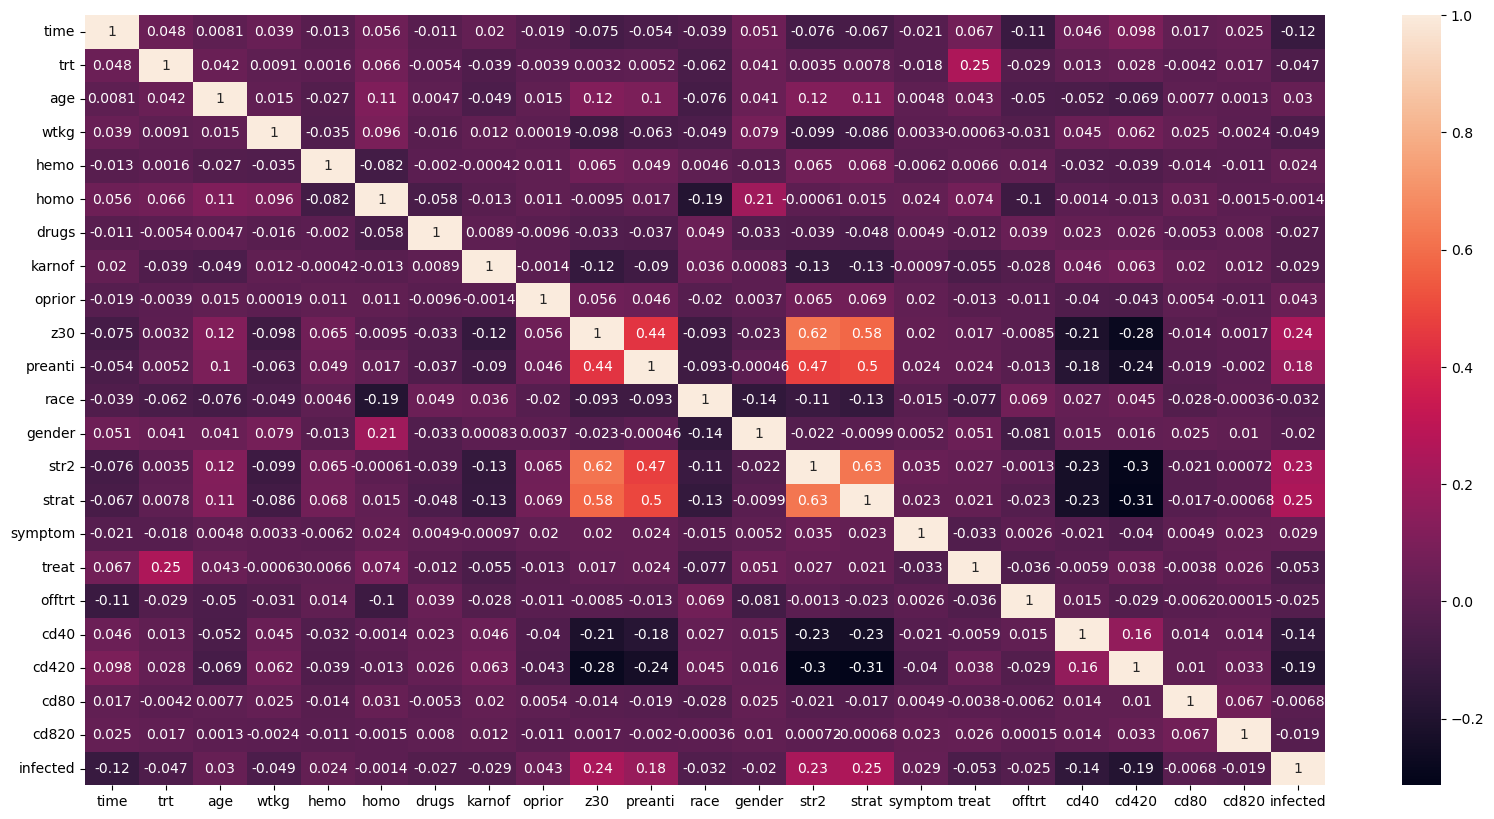

In [35]:
plt.figure(figsize= (20, 10))
sns.heatmap(df.corr(), annot= True)

## Handling of Class imbalance

In [36]:
# create independent & dependent features

columns = df.columns.tolist()

# filter the columns to remove data we do not want
columns = [i for i in columns if i not in ['infected']]

# Store the variable we are predicting
target = 'infected'

# Define a random state
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]

x_outliers = state.uniform(low = 0 , high = 1 , size=(X.shape[0] ,X.shape[1]))

# shape of X & Y
print(X.shape)
print(Y.shape)

(72139, 22)
(72139,)


In [37]:
# Checking if data is balanced or not

df.infected.value_counts()

0    49902
1    22237
Name: infected, dtype: int64

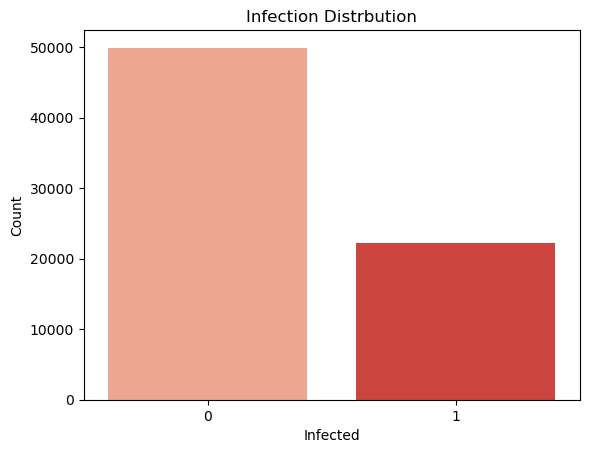

In [38]:
sns.countplot(x = 'infected' , data = df , palette = 'Reds')
plt.xlabel('Infected')
plt.ylabel('Count')
plt.title("Infection Distrbution")
plt.show()
# 0 = not infected
# 1 = infected

In [39]:
infected      = df[df['infected'] == 1]
non_infected  = df[df['infected'] == 0]

In [40]:
print(infected.shape , non_infected.shape)

(22237, 23) (49902, 23)


## SMOTE - Synthetic Minority Oversampling Technique

In [41]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

## Implementing oversampling for handling Imabalanced data

In [43]:
smk = SMOTETomek(random_state = 42)
X_train_resampled, y_train_resampled = smk.fit_resample(X,Y)

In [44]:
X_train_resampled.shape, y_train_resampled.shape

((95766, 22), (95766,))

### Comparison of original & resampled dataset shape

In [45]:
from collections import Counter
print("Original dataset shape {}".format(Counter(Y)))
print("Resampled dataset shape {}".format(Counter(y_train_resampled)))


Original dataset shape Counter({0: 49902, 1: 22237})
Resampled dataset shape Counter({0: 47883, 1: 47883})


# Model Initialization , Model Training & Model Evaluation

## Logistic Regression 

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_resampled ,y_train_resampled)

LogisticRegression()

In [47]:
pred_logreg = logreg.predict(X_test)

In [48]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix , classification_report,f1_score

In [49]:
precision = precision_score(y_test , pred_logreg)
precision

0.43282988871224165

In [50]:
confusion_matrix(y_test, pred_logreg)

array([[8236, 4281],
       [2251, 3267]], dtype=int64)

In [51]:
accuracy = accuracy_score(y_test, pred_logreg)
accuracy

0.6378153590241198

In [52]:
recall = recall_score(y_test, pred_logreg)
recall

0.5920623414280537

In [248]:
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72     12517
           1       0.43      0.59      0.50      5518

    accuracy                           0.64     18035
   macro avg       0.61      0.63      0.61     18035
weighted avg       0.68      0.64      0.65     18035



In [53]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [54]:
y_prob = logreg.predict_proba(X_test)[:, 1]

In [55]:
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc

0.6702086177658841

In [58]:
fpr , tpr , threshold = roc_curve(y_test , y_prob)  

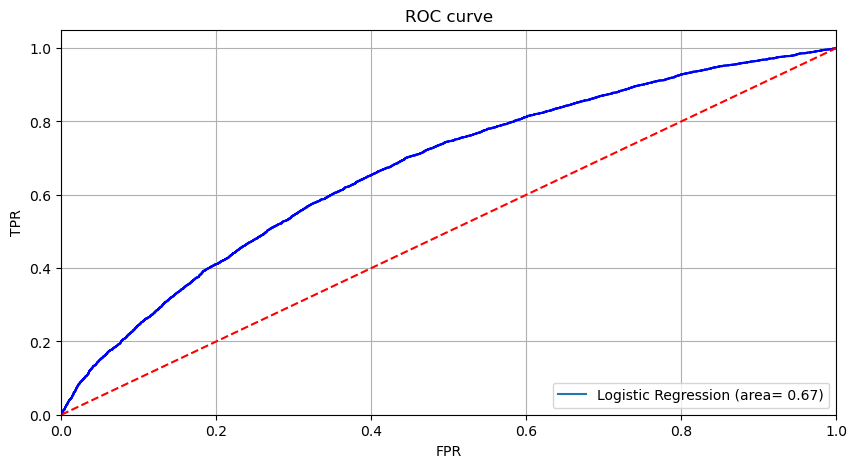

In [59]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % roc_auc)
plt.plot(fpr , tpr  , color = 'blue')
plt.title('ROC curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.grid()

## Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

In [61]:
rfc.fit(X_train_resampled ,y_train_resampled)
pred_rfc = rfc.predict(X_test)

In [64]:
confusion_matrix = confusion_matrix(y_test, pred_rfc)
confusion_matrix

array([[12395,   122],
       [  288,  5230]], dtype=int64)

In [65]:
accuracy = confusion_matrix.diagonal().sum()/confusion_matrix.sum()
accuracy

0.9772664263931244

<Axes: >

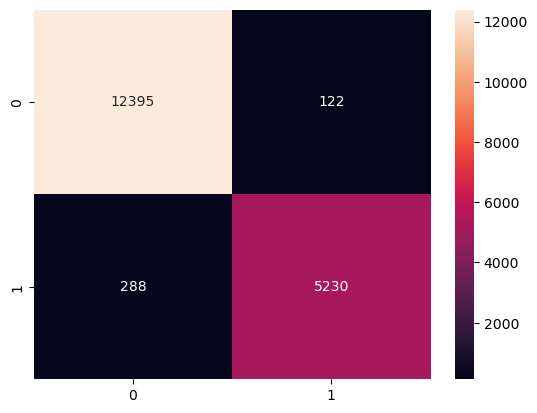

In [66]:
sns.heatmap(confusion_matrix , annot=True, fmt="d")

In [67]:
accuracy = accuracy_score(y_test, pred_rfc)
accuracy

0.9772664263931244

In [68]:
precision = precision_score(y_test, pred_rfc)
precision

0.977204783258595

In [69]:
recall = recall_score(y_test, pred_rfc)
recall

0.9478071765132294

In [70]:
f1 = f1_score(y_test, pred_rfc)
f1

0.9622815087396505

## Classification Report

In [71]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     12517
           1       0.98      0.95      0.96      5518

    accuracy                           0.98     18035
   macro avg       0.98      0.97      0.97     18035
weighted avg       0.98      0.98      0.98     18035



In [261]:
print('Accuracy  --> ', accuracy_score(y_test, pred_rfc))
print('precision --> ', precision_score(y_test, pred_rfc))
print('f1_score  --> ', f1_score(y_test, pred_rfc))

Accuracy  -->  0.9772664263931244
precision -->  0.977204783258595
f1_score  -->  0.9622815087396505


# FEATURE IMPORTANCE ON RANDOM FOREST

In [79]:
rfc.feature_importances_

array([0.09133379, 0.0337381 , 0.07535506, 0.08246873, 0.00502143,
       0.01816996, 0.01313414, 0.0588193 , 0.00496948, 0.01503345,
       0.10893527, 0.02144347, 0.01213419, 0.01342989, 0.0345551 ,
       0.00837864, 0.0251363 , 0.02504585, 0.0893701 , 0.09909351,
       0.08103078, 0.08340347])

In [83]:
X_train_resampled.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820'],
      dtype='object')

In [85]:
rfc_feat_imp = pd.DataFrame()

rfc_feat_imp['Features'] = X_train_resampled.columns
rfc_feat_imp['Imp'] = rfc.feature_importances_
rfc_feat_imp

,Features,Imp
0,time,0.091334
1,trt,0.033738
2,age,0.075355
3,wtkg,0.082469
4,hemo,0.005021
5,homo,0.018170
6,drugs,0.013134
7,karnof,0.058819
8,oprior,0.004969
9,z30,0.015033


In [93]:
significant_feat = rfc_feat_imp.sort_values('Imp',ascending = False)
significant_feat

,Features,Imp
10,preanti,0.108935
19,cd420,0.099094
0,time,0.091334
18,cd40,0.089370
21,cd820,0.083403
3,wtkg,0.082469
20,cd80,0.081031
2,age,0.075355
7,karnof,0.058819
14,strat,0.034555


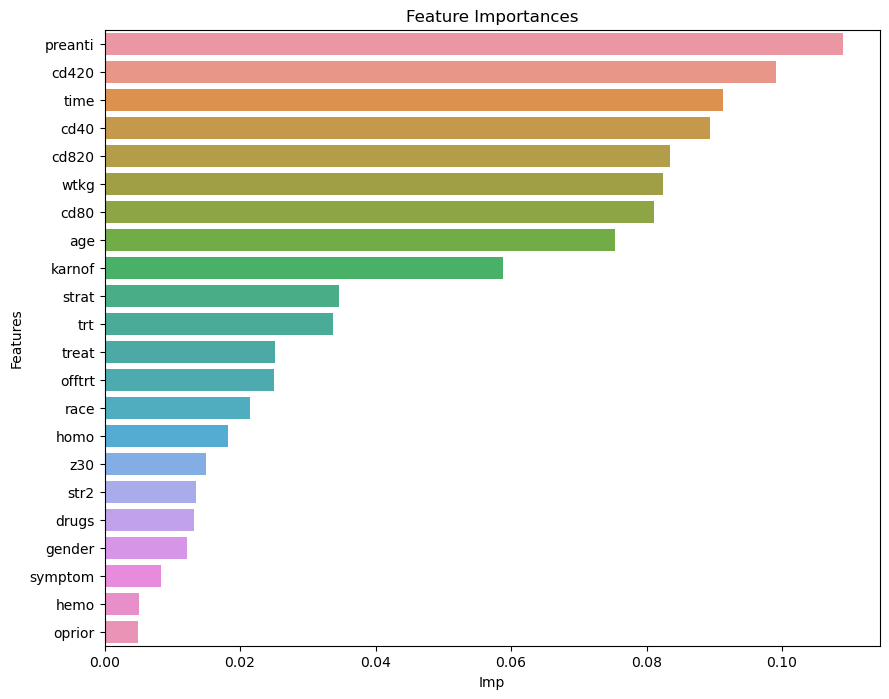

In [203]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Imp', y='Features', data=significant_feat)
plt.title('Feature Importances')
plt.show()

Obdervation - Feature importance helped to understand which features contribute most to our model's predictions.

In [174]:
significant_feat.Imp[0:7].sum()

0.6356356485409852

### Random forest classification model building on the few of the most significant features.

In [177]:
l1 = list(significant_feat.Features[0:7])
l1.append('infected')

In [178]:
df_imp_feat = df.loc[:,l1]
df_imp_feat.shape

(72139, 8)

In [179]:
df_imp_feat

,preanti,cd420,time,cd40,cd820,wtkg,cd80,infected
0,911.0,290.0,988.0,290.0,1671.0,71.761310,1870.0,0
1,414.0,506.0,413.0,506.0,523.0,72.676290,1372.0,0
2,810.0,499.0,1119.0,499.0,1474.0,73.755140,609.0,0
3,0.0,313.0,680.0,313.0,987.0,70.037690,780.0,0
4,3.0,337.0,1043.0,337.0,1735.0,63.028450,698.0,0
...,...,...,...,...,...,...,...,...
72134,2.0,263.0,1162.0,263.0,608.0,59.630570,2043.0,0
72135,0.0,327.0,1158.0,327.0,392.0,100.718528,839.0,0
72136,257.0,283.0,468.0,283.0,1000.0,79.071210,2043.0,1
72137,278.0,237.0,1194.0,237.0,860.0,80.517790,560.0,0


In [180]:
df_imp_feat.infected.value_counts()

0    49902
1    22237
Name: infected, dtype: int64

In [181]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [184]:
# create independent & dependent features

columns = df_imp_feat.columns.tolist()

# filter the columns to remove data we do not want
columns = [i for i in columns if i not in ['infected']]

# Store the variable we are predicting
target = 'infected'

# Define a random state
state = np.random.RandomState(42)
X_feat = df[columns]
Y_feat = df[target]

x_outliers = state.uniform(low = 0 , high = 1 , size=(X_feat.shape[0] ,X_feat.shape[1]))

# shape of X & Y
print(X_feat.shape)
print(Y_feat.shape)

(72139, 7)
(72139,)


In [185]:
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X_feat, Y_feat, test_size=0.25, random_state=42)

In [186]:
smk = SMOTETomek(random_state = 42)
X_train_feat_resampled, y_train_feat_resampled = smk.fit_resample(X_feat,Y_feat)

In [187]:
X_train_feat_resampled.shape, y_train_feat_resampled.shape

((94442, 7), (94442,))

In [188]:
from collections import Counter
print("Original dataset shape {}".format(Counter(Y_feat)))
print("Resampled dataset shape {}".format(Counter(y_train_feat_resampled)))

Original dataset shape Counter({0: 49902, 1: 22237})
Resampled dataset shape Counter({0: 47221, 1: 47221})


In [189]:
rfc.fit(X_train_feat_resampled ,y_train_feat_resampled)
pred_feat_rfc = rfc.predict(X_test_feat)

In [197]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

### Confusion Matrix

In [192]:
confusion_matrix_feat = confusion_matrix(y_test_feat, pred_feat_rfc)
confusion_matrix_feat

array([[12271,   246],
       [  302,  5216]], dtype=int64)

<Axes: >

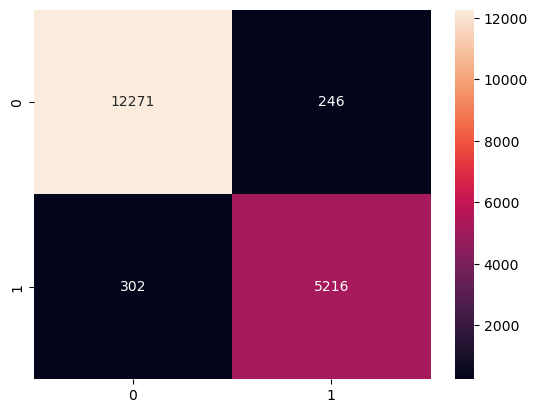

In [205]:
sns.heatmap(confusion_matrix_feat, annot=True, fmt="d")

In [251]:
precision = precision_score(y_test_feat, pred_feat_rfc)
precision

0.9549615525448554

In [198]:
accuracy = confusion_matrix_feat.diagonal().sum()/confusion_matrix_feat.sum()
accuracy

0.9696146382034933

In [199]:
recall = recall_score(y_test_feat, pred_feat_rfc)
recall

0.9452700253715114

In [200]:
f1_score = f1_score(y_test_feat, pred_feat_rfc)
f1_score

0.9500910746812387

In [201]:
accuracy = accuracy_score(y_test_feat, pred_feat_rfc)
accuracy

0.9696146382034933

### Classification Report

In [193]:
print(classification_report(y_test_feat, pred_feat_rfc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12517
           1       0.95      0.95      0.95      5518

    accuracy                           0.97     18035
   macro avg       0.97      0.96      0.96     18035
weighted avg       0.97      0.97      0.97     18035



## Decision Tree

In [258]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
dt = DecisionTreeClassifier(criterion='gini' , random_state = 32)

In [73]:
dt.fit(X_train_resampled ,y_train_resampled)
pred_dt = dt.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
confusion_matrix = confusion_matrix(y_test, pred_dt)
confusion_matrix

array([[12334,   183],
       [  252,  5266]], dtype=int64)

In [250]:
precision = accuracy_score(y_test , pred_dt)
precision

0.9758802328805101

In [76]:
accuracy = accuracy_score(y_test , pred_dt)
accuracy

0.9758802328805101

In [77]:
recall = recall_score(y_test, pred_dt)
recall

0.9543312794490757

In [78]:
f1_score = f1_score(y_test, pred_dt)
f1_score

0.9603355521108781

## Classification Report

In [55]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     12517
           1       0.97      0.96      0.96      5518

    accuracy                           0.98     18035
   macro avg       0.97      0.97      0.97     18035
weighted avg       0.98      0.98      0.98     18035



In [260]:
print('Accuracy  --> ', accuracy_score(y_test, pred_dt))
print('precision --> ', precision_score(y_test, pred_dt))
print('f1_score  --> ', f1_score(y_test, pred_dt))

Accuracy  -->  0.9758802328805101
precision -->  0.966415856120389
f1_score  -->  0.9603355521108781


## Decision Tree Build

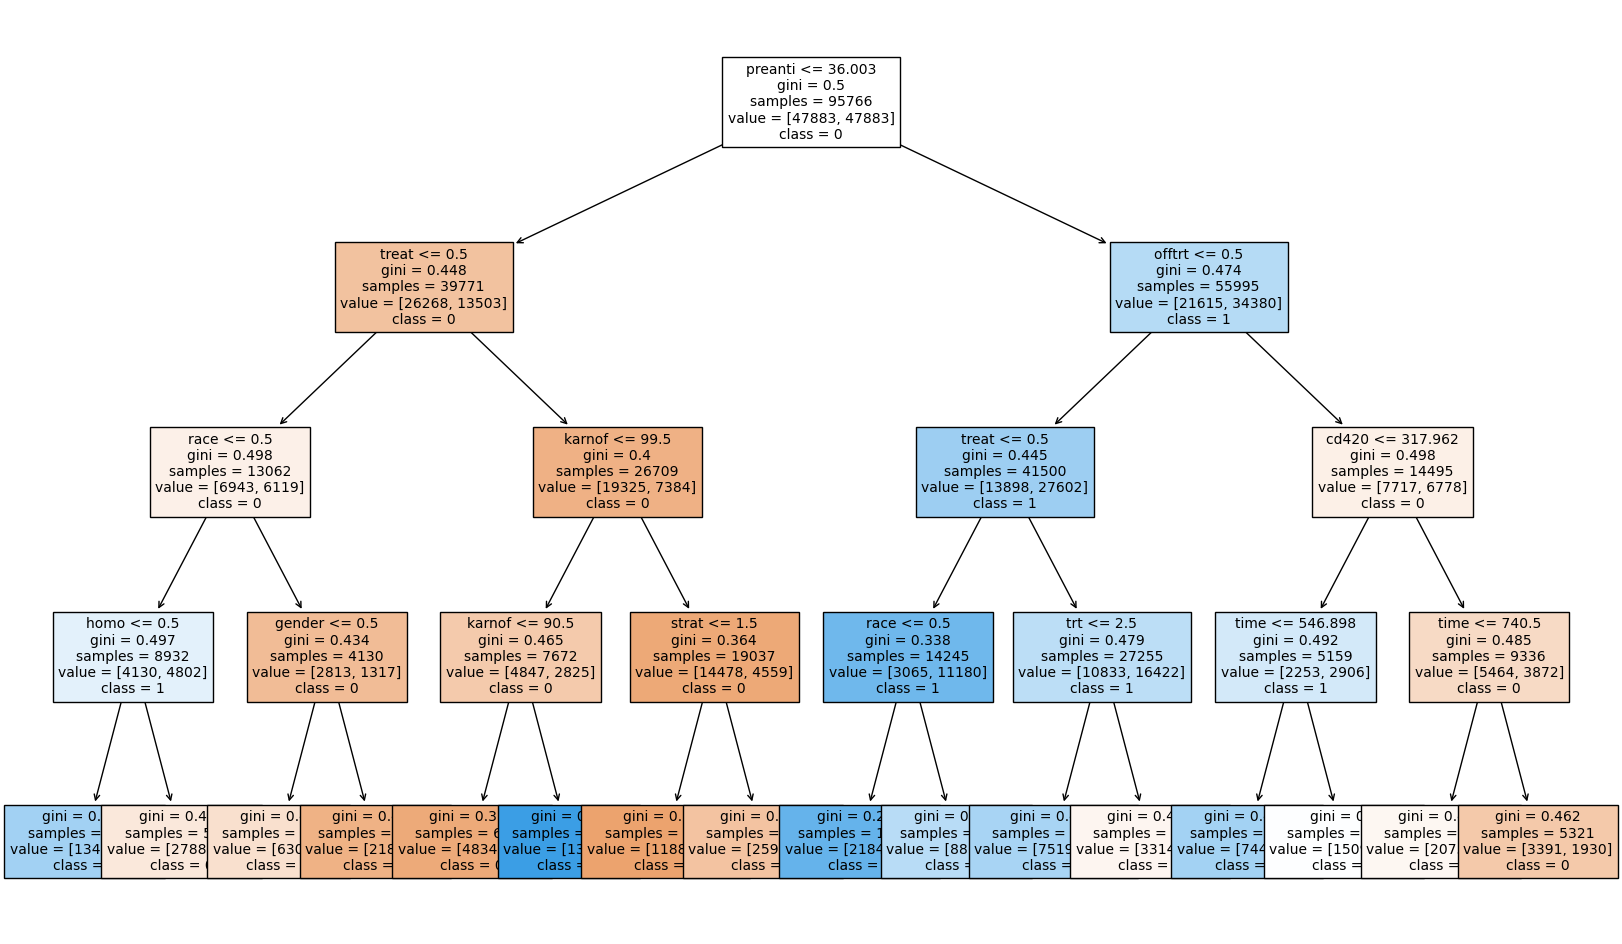

In [259]:
max_depth = 4
dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
dt_classifier.fit(X_train_resampled ,y_train_resampled)

# Convert Index object to list of feature names
feature_names_list = X_train_resampled.columns.tolist()

# Visualize the decision tree with reduced depth
plt.figure(figsize=(20, 12))
plot_tree(dt_classifier, filled=True, feature_names=feature_names_list, class_names=['0', '1'], fontsize=10)
plt.show()

### prediction on train data

In [145]:
pred_train = dt.predict(X_train_resampled)  # on train

In [147]:
train_accuracy = accuracy_score(y_train_resampled, pred_train)
train_accuracy

1.0

In [150]:
train_precision = precision_score(y_train_resampled, pred_train)
train_precision

1.0

In [151]:
train_recall = recall_score(y_train_resampled, pred_train)
train_recall

1.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [149]:
print(classification_report(y_train_resampled, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47937
           1       1.00      1.00      1.00     47937

    accuracy                           1.00     95874
   macro avg       1.00      1.00      1.00     95874
weighted avg       1.00      1.00      1.00     95874



## Boosting Algorithms

### Cat Boost Classifier

In [36]:
from catboost import CatBoostClassifier
cbc  = CatBoostClassifier()

In [37]:
cbc.fit(X_train_resampled ,y_train_resampled)

Learning rate set to 0.072297
0:	learn: 0.6638822	total: 419ms	remaining: 6m 59s
1:	learn: 0.6519332	total: 485ms	remaining: 4m 2s
2:	learn: 0.6417964	total: 522ms	remaining: 2m 53s
3:	learn: 0.6336040	total: 558ms	remaining: 2m 18s
4:	learn: 0.6264322	total: 593ms	remaining: 1m 57s
5:	learn: 0.6101209	total: 640ms	remaining: 1m 46s
6:	learn: 0.6042010	total: 696ms	remaining: 1m 38s
7:	learn: 0.5995061	total: 747ms	remaining: 1m 32s
8:	learn: 0.5949648	total: 797ms	remaining: 1m 27s
9:	learn: 0.5837079	total: 853ms	remaining: 1m 24s
10:	learn: 0.5803165	total: 908ms	remaining: 1m 21s
11:	learn: 0.5769865	total: 954ms	remaining: 1m 18s
12:	learn: 0.5739967	total: 991ms	remaining: 1m 15s
13:	learn: 0.5714307	total: 1.03s	remaining: 1m 12s
14:	learn: 0.5693162	total: 1.07s	remaining: 1m 10s
15:	learn: 0.5670218	total: 1.12s	remaining: 1m 8s
16:	learn: 0.5651911	total: 1.16s	remaining: 1m 6s
17:	learn: 0.5633730	total: 1.2s	remaining: 1m 5s
18:	learn: 0.5616482	total: 1.23s	remaining: 1m 3

In [38]:
pred_cat = cbc.predict(X_test)

In [39]:
confusion_matrix(y_test, pred_cat)

array([[10292,  2225],
       [ 2620,  2898]], dtype=int64)

In [40]:
print(classification_report(y_test , pred_cat))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     12517
           1       0.57      0.53      0.54      5518

    accuracy                           0.73     18035
   macro avg       0.68      0.67      0.68     18035
weighted avg       0.73      0.73      0.73     18035



## XGB Classifier

In [166]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [103]:
xgb.fit(X_train_resampled ,y_train_resampled)
pred_xgb = xgb.predict(X_test)

In [105]:
confusion_matrix(y_test, pred_xgb)

array([[10381,  2136],
       [ 2496,  3022]], dtype=int64)

In [106]:
print(classification_report(y_test , pred_xgb))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     12517
           1       0.59      0.55      0.57      5518

    accuracy                           0.74     18035
   macro avg       0.70      0.69      0.69     18035
weighted avg       0.74      0.74      0.74     18035



## Hyperparameter tunning of XGB

In [45]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot
from six import StringIO
import graphviz

In [169]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [170]:
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_resampled ,y_train_resampled)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=1)

In [176]:
xgb_tunned = grid_search.best_estimator_
pred_xgb2 = xgb_tunned.predict(X_test)


## Best Parameters

In [175]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 200,
 'subsample': 0.9}

In [178]:
accuracy = accuracy_score(y_test , pred_xgb2)
accuracy

0.7619628500138619

In [179]:
print(classification_report(y_test , pred_xgb2))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83     12517
           1       0.62      0.57      0.59      5518

    accuracy                           0.76     18035
   macro avg       0.72      0.71      0.71     18035
weighted avg       0.76      0.76      0.76     18035



## Comparison Of All Models

In [255]:
algorithm_names = ['Logistic Regression', 'Random Forest' ,'Decision Tree']
accuracy_scores = [0.64, 0.98, 0.97]
precision_scores = [0.79, 0.97, 0.97]
recall_scores = [0.66 ,0.94 , 0.95]
f1_scores = [0.72, 0.96, 0.96]

# Create a dictionary to hold the data
data = {
    'Algorithm': algorithm_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall' : recall_scores,
    'F1 Score': f1_scores
}

# Creating a DataFrame from the dictionary
summary = pd.DataFrame(data)

# Displaying the DataFrame
print(summary)


             Algorithm  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression      0.64       0.79    0.66      0.72
1        Random Forest      0.98       0.97    0.94      0.96
2        Decision Tree      0.97       0.97    0.95      0.96


## CONCLUSION

The Random Forest model, with a accuracy of 98% , outperforms other models, showcasing its balanced performance, 
robustness, flexibility, and feature importance insights, making it the optimal choice for accurate and reliable predictions.
Based on the evaluation results, we recommend using the Random Forest model for predicting whether a patient is having AIDS
infection or not having infection.
Its superior performance across all metrics makes it the most suitable choice for this prediction task.